In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))

# w = [weight1, weight2, weight3, weight4]
w1 = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float32))
w2 = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float32))
w3 = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float32))
w4 = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float32))


# analysis 함수 
def anal(x, lamb = 1):
    return np.exp(lamb*x)

def f(anal, lamb = 1):
    return lamb*anal

# n : w 개수, w : weight
def y(x, w1, w2, w3, w4):
    y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    
    return y


def yprime(x, w1, w2, w3, w4):
    yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)

    return yprime

# lambda 값, 학습률 조정
lamb = 1
learning_rate = 0.01
EPOCH = 10

# 변화 w 값 출력
w1_trace = []
w2_trace = []
w3_trace = []
w4_trace = []
w1_trace.append(w1.numpy())
w2_trace.append(w2.numpy())
w3_trace.append(w3.numpy())
w4_trace.append(w4.numpy())
loss_trace = []

# 학습 과정
for epoch in range(EPOCH):
    for x_unit, y_unit in zip(x, f(anal(x), lamb)):
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x_unit, w1, w2, w3, w4)
            # predict = 1 + w1*(x_unit) + w2*(x_unit**2) + w3*(x_unit**3) + w4*(x_unit**4)
            # 오차
            # loss = tf.reduce_mean(tf.square(yprime(x, w) - f(anal(x), lamb)))
            loss = (predict - y_unit)**2
            loss_trace.append(loss)
            gradients = tape.gradient(loss, [w1, w2, w3, w4])

            w1 = tf.Variable(w1 - learning_rate*gradients[0], dtype=tf.float32)
            w2 = tf.Variable(w2 - learning_rate*gradients[1], dtype=tf.float32)
            w3 = tf.Variable(w3 - learning_rate*gradients[2], dtype=tf.float32)
            w4 = tf.Variable(w4 - learning_rate*gradients[3], dtype=tf.float32)
            w1_trace.append(w1.numpy())
            w2_trace.append(w2.numpy())
            w3_trace.append(w3.numpy())
            w4_trace.append(w4.numpy())

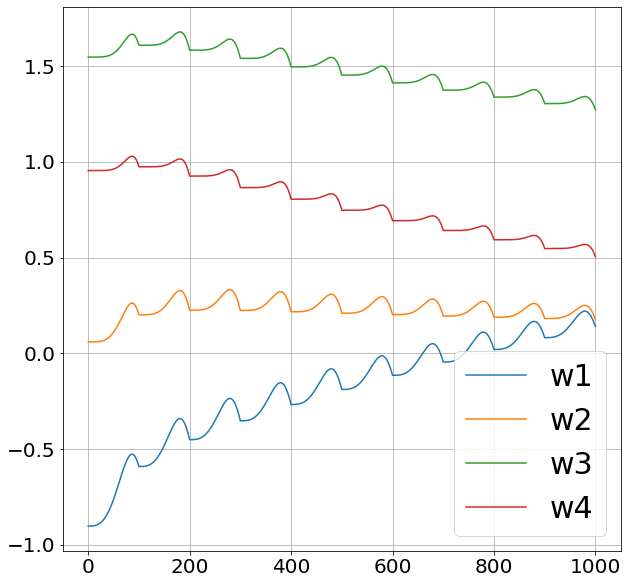

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(w1_trace, label = 'w1')
ax.plot(w2_trace, label = 'w2')
ax.plot(w3_trace, label = 'w3')
ax.plot(w4_trace, label = 'w4')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

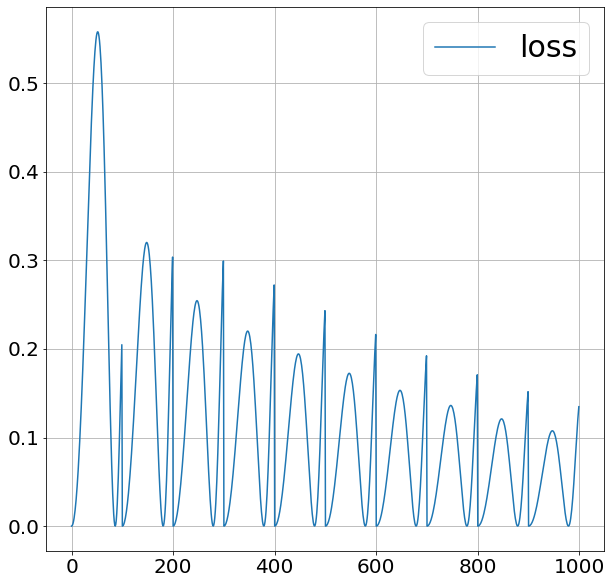

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

In [13]:
print(w1, w2, w3, w4)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.14018625], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.17630388], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.2720053], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.50456184], dtype=float32)>
